# 2019 Ecuador election analysis - Mayoral elections

### Introduction

The focus of this analysis is to identify party performance in mayoral elections. Specifically, the analysis focuses on the parties that had won the most in these elections. Local elections took place on March 24, 2019. Some local authorities won with less than a third of support of the electorate due to the sheer number of candidates running for a single seat, which points out to a deep party fragmentation in the political system. 

### Background

Ecuador has a multi-party system with almost no long-standing party tradition. Multiple parties emerge every few years in a sort of political cycle, even though most politicians have been around for several decades, but with different political organizations. General elections and local elections take place every four years but with a lag of two years between each other. The last general election was in 2017, whereas the last local election was in 2019. Next general election is in 2021.

Even though the multi-party system is hailed as an expression of democracy, it is clear that there is a significant fragmentation in the political system. There were more than 40 000 candidates for the 5 661 available seats for local authorities. That is an average of seven candidates for each seat. The following analysis focuses only on the elections for mayor in the 221 city councils in the country.

### Exploration

In [1]:
options(warn=-1)

In [2]:
# loading libraries
library(tidyverse)
library(plotly)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [3]:
# loading data for political parties
load("parties.Rdata")
partidos_alc <- partidos_alc %>%
  mutate(OP_SIGLAS = as.factor(toupper(as.character(OP_SIGLAS)))) #OP_SIGLAS - acronyms for parties
head(partidos_alc)

OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ESTADO,OP_NOMBRE,OP_SIGLAS
3,2,Electos,Partido Sociedad Patriotica 21 De Enero,PSP
37,3,No Electos,"Movimiento Sociedad Unida Mas Accion, Suma",SUMA
31,9,Electos,Movimiento Peninsular Creyendo En Nuestra Gente,MPCNG
12,10,No Electos,Movimiento De Unidad Plurinacional Pachakutik,MUPP
3,16,No Electos,Partido Sociedad Patriotica 21 De Enero,PSP
210,17,No Electos,Movimiento De Accion Ciudadana Fenix,MACF


In [4]:
# number of candidates
partidos_alc %>%
  select(CANDIDATO_CODIGO) %>% #CANDIDATO_CODIGO - id for each candidate
  summarise(total.count = n())

total.count
1875


In [5]:
# number of parties
partidos_alc %>%
  select(OP_CODIGO) %>% #OP_CODIGO - id for each party
  unique() %>%
  tally()

n
380


There are 1 875 candidates from 380 parties for the mayoral elections. That means that there was an average of almost 8.5 candidates for each of the 221 cantones (city council) of the country. It is important to note that the number of parties differ if I consider either their names or their acronyms. Some parties use the same acronym, despite having different names. Some names in the data set use the generic word 'Alianza' (alliance, in Spanish), meaning that they do not differentiate between one another.

The variable 'OP_CODIGO' uses a unique id for each party. There are some cases where the same party or alliance will have a different id based on the location in which they are participating. However, this happens when the party or alliance is local, instead of regional or national. The assumption is that these parties or alliances do not have a strong performance; therefore, it will not affect the analysis of larger parties. This is confirmed by getting the same results for top parties when using both the acronyms and the unique id.

### Number of victories by party or alliance

In [18]:
# getting 10 top individual parties and alliances
top_parties <- partidos_alc %>%
  filter(CANDIDATO_ESTADO == "Electos") %>% #filtering the elected candidates
  group_by(OP_SIGLAS) %>%
  count(OP_SIGLAS) %>%
  arrange(desc(n)) %>%
  head(10) %>% droplevels()
(round(sum(top_parties$n)/221, 2))*100

[1] 40

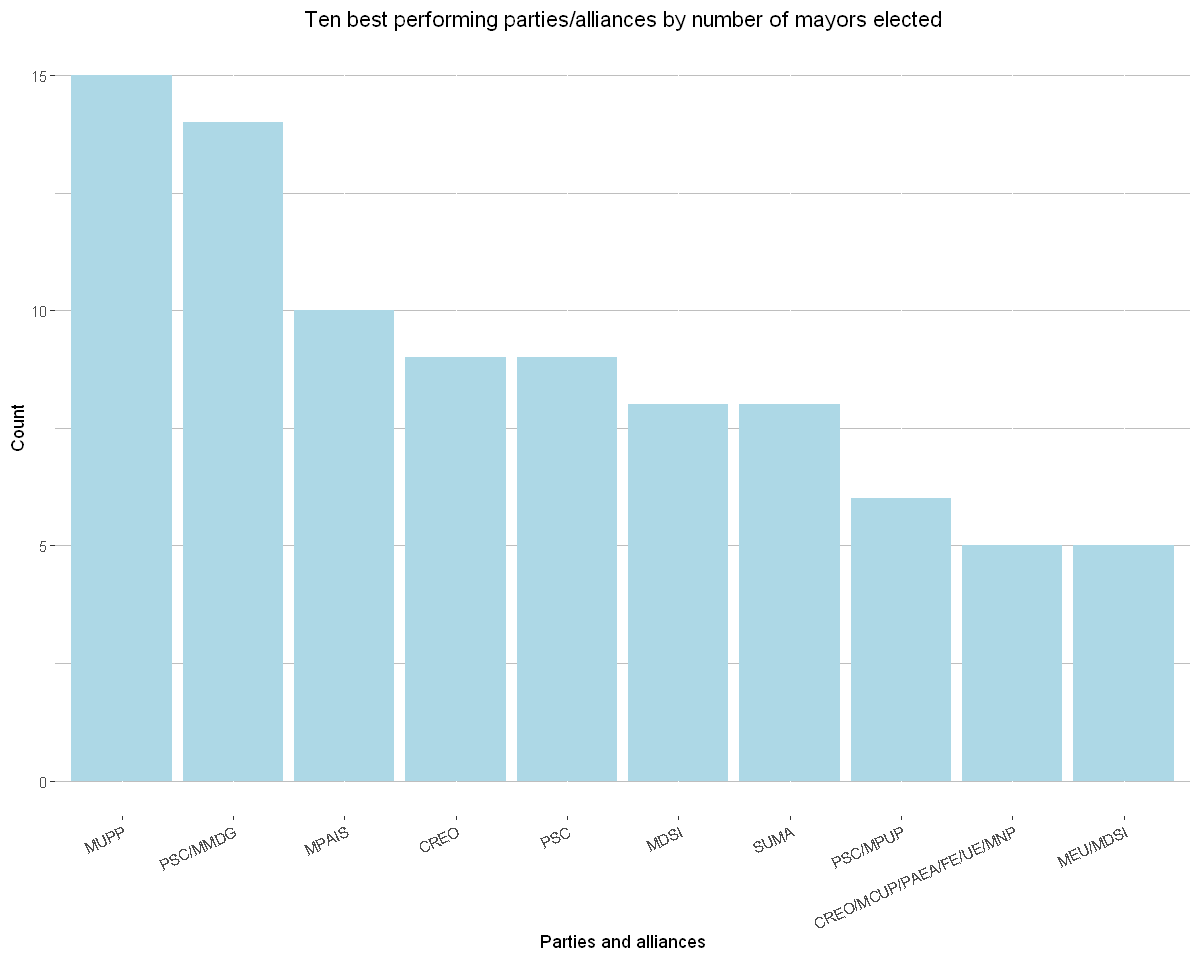

In [19]:
options(repr.plot.width=10, repr.plot.height=8)
top_plot <- ggplot(top_parties, aes(x = reorder(OP_SIGLAS, -n), y = n)) +
  geom_bar(stat = 'identity', alpha = 1, fill='lightblue') +
  ggtitle('Ten best performing parties/alliances by number of mayors elected') +
  xlab('Parties and alliances') +
  ylab('Count') +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 25, vjust = 1, hjust=1),
        panel.background = element_rect(fill = 'white'),
        panel.grid.major.y = element_line(size = 0.5, linetype = 'solid', color = 'gray'),
        panel.grid.minor.y = element_line(size = 0.05, linetype = 'solid', color = 'gray'))
top_plot

Based on the number of victories, the MUPP could be considered the most successful party, as it managed to win in 15 cantones. However, there is a problem with this assertion, as it does not take into account how powerful alliances can be. Looking at the second, fifth and eight position, it appears that the PSC beats the MUPP, as it has won in more places by forming alliances. The victories of these 10 parties and alliances represent about 40% of the cantones in the country. It is also noteworthy the alliance between six parties, which has five victories.

### Number of victories by number of parties in alliance

In theory, an alliance would entail that the parties involved are sharing power. However, in practice that is not always the case. A single individual and not a council take the mayor seat. An alliance may be formed by party x and y, where the candidate for mayor comes from party x. Voters may expect that the alliance will achieve some sort of balance between two parties when governing, but it is highly likely that the candidate will almost always favor party x policies. Another issue has to do with agreements between parties, where the support for the alliance can be explicitly divided between the parties involved. As an example, an agreement may give the major party 70% of the control of local government, as it invests more resources and has a wider support in the electorate.

It is difficult to determine how each particular agreement works and it may take a whole different analysis and approach to accurately represent the balance of power in alliances. However, for the purposes of this analysis, the idea is to show how much the involvement of alliances can change the performance of parties in local elections. For this reason, the next step does not assume a division of power, but only accounts for the presence of a party in an alliance. This means that if party x and y share an alliance, both parties are registered to have won an election. This would inflate the real number of victories for each party. Nonetheless, it works as a representation of how much the party system can change and how important and widespread alliances are.

In [16]:
# all winning parties and alliances
alliances <- partidos_alc %>%
  mutate(parties_n = str_count(OP_SIGLAS, "/") + 1) %>% #how many parties are in the alliance
  filter(CANDIDATO_ESTADO == "Electos")

alliances %>%
  group_by(parties_n) %>%
  mutate(total_allliance = n()) %>%
  select(parties_n, total_allliance) %>% unique() %>% 
  arrange(parties_n) %>% ungroup() %>%
  mutate(perc = total_allliance/sum(total_allliance)*100)

parties_n,total_allliance,perc
1,107,48.416290
2,78,35.294118
3,17,7.692308
4,6,2.714932
5,8,3.619910
6,5,2.262443


Single parties won in 107 cantones in the country, which is little under half of all the city councils in the country. The majority of victories for mayor belong to alliances, being the alliance of two parties the most used (35.3%).

Joining, by = "party"


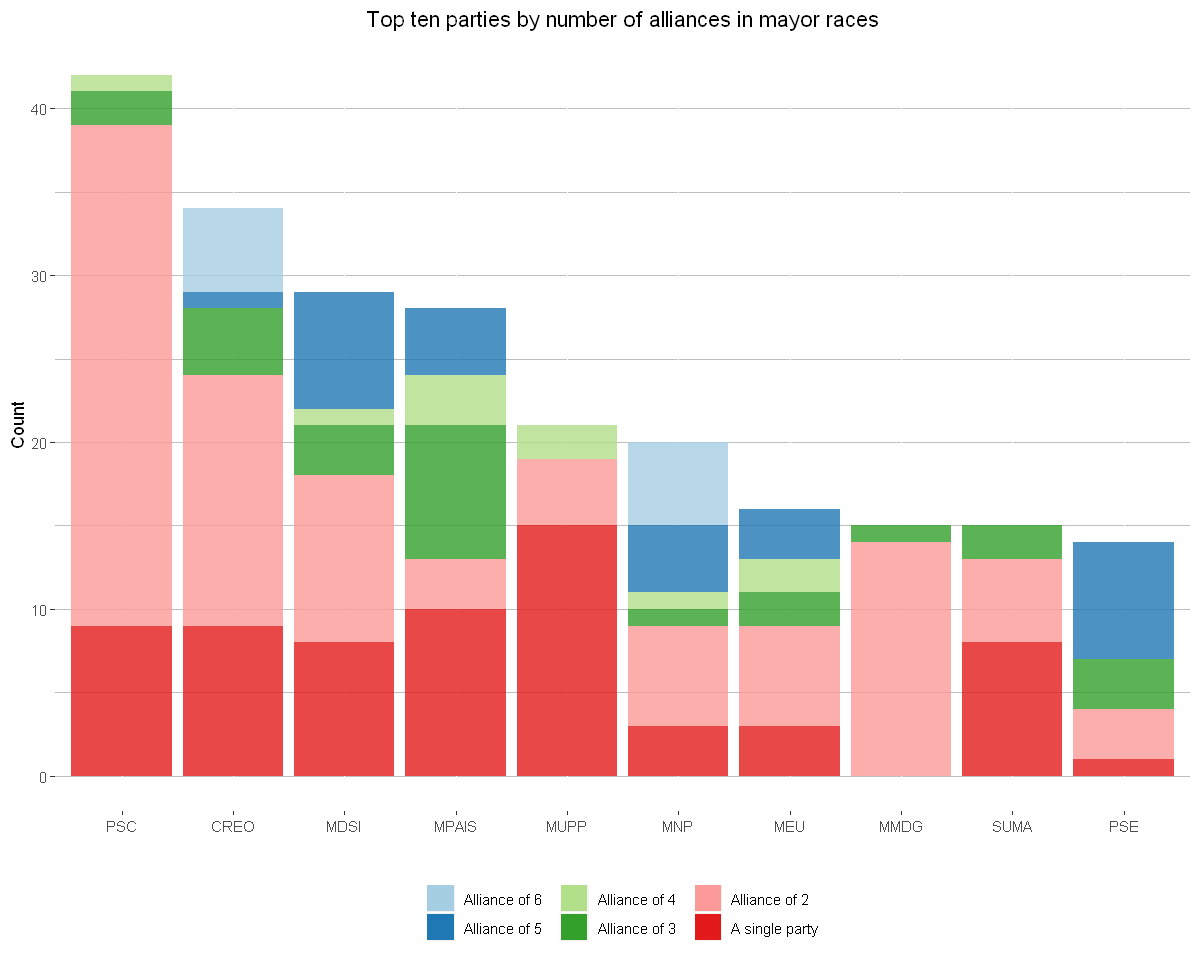

In [17]:
# parties per alliance
alliances <- as_tibble(str_split(alliances$OP_SIGLAS, "/", simplify = TRUE))

# number of victories of each party running alone or as a part of an alliance
alliances <- alliances %>% 
  mutate(parties_n = rowSums(alliances != "")) %>% #sums the number of parties in each election
  gather("V1","V2","V3","V4","V5","V6", key = "V", value = "party") %>% #reshape data
  filter(party != "") %>% #removes NA
  count(party, parties_n) %>% #number of times a party appears per number of alliance
  group_by(party) %>% 
  mutate(total = sum(n)) %>% 
  arrange(desc(total), desc(parties_n), desc(n)) %>% 
  ungroup()

# identifying top ten individual parties
alliances <- alliances %>%
  left_join(alliances[!duplicated(alliances$party),] %>% #modify alliances by deleting party duplicates
              select(party) %>% #takes only one variable
              mutate(id_party = row_number())) %>% #creates id to join
  filter(id_party <= 10) %>% #filters by id
  mutate(parties_n = case_when(
    .$parties_n == 1 ~ 'A single party',
    .$parties_n == 2 ~ 'Alliance of 2',
    .$parties_n == 3 ~ 'Alliance of 3',
    .$parties_n == 4 ~ 'Alliance of 4',
    .$parties_n == 5 ~ 'Alliance of 5',
    .$parties_n == 6 ~ 'Alliance of 6'
  ))


# plotting alliances
options(repr.plot.width=10, repr.plot.height=8)
alliances_plot <- ggplot() +
  geom_bar(data = alliances[order(alliances$parties_n, decreasing = FALSE),],
           aes(reorder(party, -total), n, fill = as.factor(parties_n),),
           stat = 'identity', alpha = 0.8, position = position_stack(reverse = TRUE)) +
  geom_bar(data = alliances[which(alliances$parties_n == 1),],
           aes(reorder(party, -total), n, fill = as.factor(parties_n),),
           stat = 'identity', position = 'dodge') +
  scale_fill_brewer(palette = "Paired", direction = -1) +
  guides(fill = guide_legend(reverse = TRUE)) +
  ggtitle('Top ten parties by number of alliances in mayor races') +
  xlab('') +
  ylab('Count') +
  theme(plot.title = element_text(hjust = 0.5),
        panel.background = element_rect(fill = 'white'),
        panel.grid.major.y = element_line(size = 0.05, linetype = 'solid', color = 'gray'),
        panel.grid.minor.y = element_line(size = 0.05, linetype = 'solid', color = 'gray'),
        legend.position = 'bottom',
        legend.title = element_blank())
alliances_plot

By taking into account the number of alliances, the order of the most successful parties changes significantly. The PSC could be considered the most successful party with 42 victories, 30 of them come from an alliance with one more party. The performance of the MUPP falls to fifth place, as it is the party with the less number victories in alliances (only 6), whereas the MMDG has no victory on its own, but 15 in alliances. Noteworthy are the parties with victories in alliances of five or six parties, as the implications of power sharing could be complex.

### Parties in second place

Turning back to the parties and alliances in the first part of this analysis, the next question was to find out if there is a trend for the parties that came in second place. The idea is to find out which parties came in second, when one of these 10 parties or alliances won the mayor race in a specific canton. In this point, I use a second dataset with the total results in each city council in the country to identify the party that came in second. It is important to note that each political party or alliance present one candidate in each canton. Therefore, I use the id for candidates to identify the number of votes to later join the data with the id for parties.

In [10]:
# loading data of total results
load("results.Rdata")
head(resultados_alc)

PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,CANDIDATO_CODIGO,VOTOS
1,Azuay,260,Cuenca,13581,2840
1,Azuay,260,Cuenca,15411,88882
1,Azuay,260,Cuenca,15881,5073
1,Azuay,260,Cuenca,22636,61607
1,Azuay,260,Cuenca,24094,46123
1,Azuay,260,Cuenca,24778,1360


In [11]:
# finding parties in second place for each victory of top parties
second_party <- resultados_alc %>%
  arrange(CANTON_CODIGO, desc(VOTOS)) %>% #CANTON_CODIGO - id for city council
  group_by(CANTON_CODIGO) %>%
  mutate(order = row_number()) %>% #creating index 
  filter(order <= 2) %>% select(-VOTOS, -PROVINCIA_CODIGO, -PROVINCIA_NOMBRE) %>%  #filtering out first and second party
  left_join(partidos_alc %>% #getting info on parties using shared variable (id for candidate)
              select(CANDIDATO_CODIGO, OP_SIGLAS), by = "CANDIDATO_CODIGO") %>%
  rename(OPS = OP_SIGLAS) %>%
  mutate(OP_SIGLAS = ifelse(order == 1, as.character(OPS), "")) %>%
  left_join(top_parties, by = "OP_SIGLAS") %>% #it can't be right join because it would remove order == 2
  mutate(n = ifelse(is.na(n) == TRUE, 0, n),
         temp = sum(n)) %>% ungroup() %>% 
  filter(temp != 0) %>%
  mutate(sec = ifelse(order == 1, as.character(lead(OPS)), NA)) %>% #creates variable with party in second place
  select(-OPS, -temp) %>%
  filter(!is.na(sec)) %>%
  count(OP_SIGLAS, n, sec)

second_party %>%
  group_by(OP_SIGLAS) %>%
  filter(nn == max(nn)) %>%
  arrange(desc(n), nn)

OP_SIGLAS,n,sec,nn
MUPP,15,MPFA/MPAIS,3
PSC/MMDG,14,MPAIS,4
MPAIS,10,PSC,2
PSC,9,MPAIS,2
PSC,9,UP,2
CREO,9,MPAIS,3
MDSI,8,PSC,2
SUMA,8,MUPP,2
PSC/MPUP,6,CREO/MSP,3
CREO/MCUP/PAEA/FE/UE/MNP,5,APLA/MPQ,1


There is no single clear contender for the parties with the best performance. For instance, the MPFA/MPAIS came in second three times when the MUPP won, which represents 20% of the victories for the MUPP. Most of these parties came in second less than 50% of the times when the top parties won. This gives further evidence of the level of fragmentation in the political system.

In [12]:
# parties that appear the most in second place
second_party %>%
  group_by(sec) %>%
  mutate(total_sec = sum(nn)) %>%
  select(-OP_SIGLAS, -n, -nn) %>% unique() %>%
  arrange(desc(total_sec)) %>%
  head(20)

sec,total_sec
MPAIS,12
PSC,6
MUPP,5
CREO,4
PSC/MMDG,3
UP,3
MPFA/MPAIS,3
CREO/MSP,3
SUMA,2
MNP/MPDR,2


The table shows the 20 first parties that came in second when the top ten parties won. MPAIS is the party that came in second the most. It would appear that single parties, in this specific case, had a better performance than alliances, since they are represented by the first four positions with the highest values.

### Difference between parties in first and second place

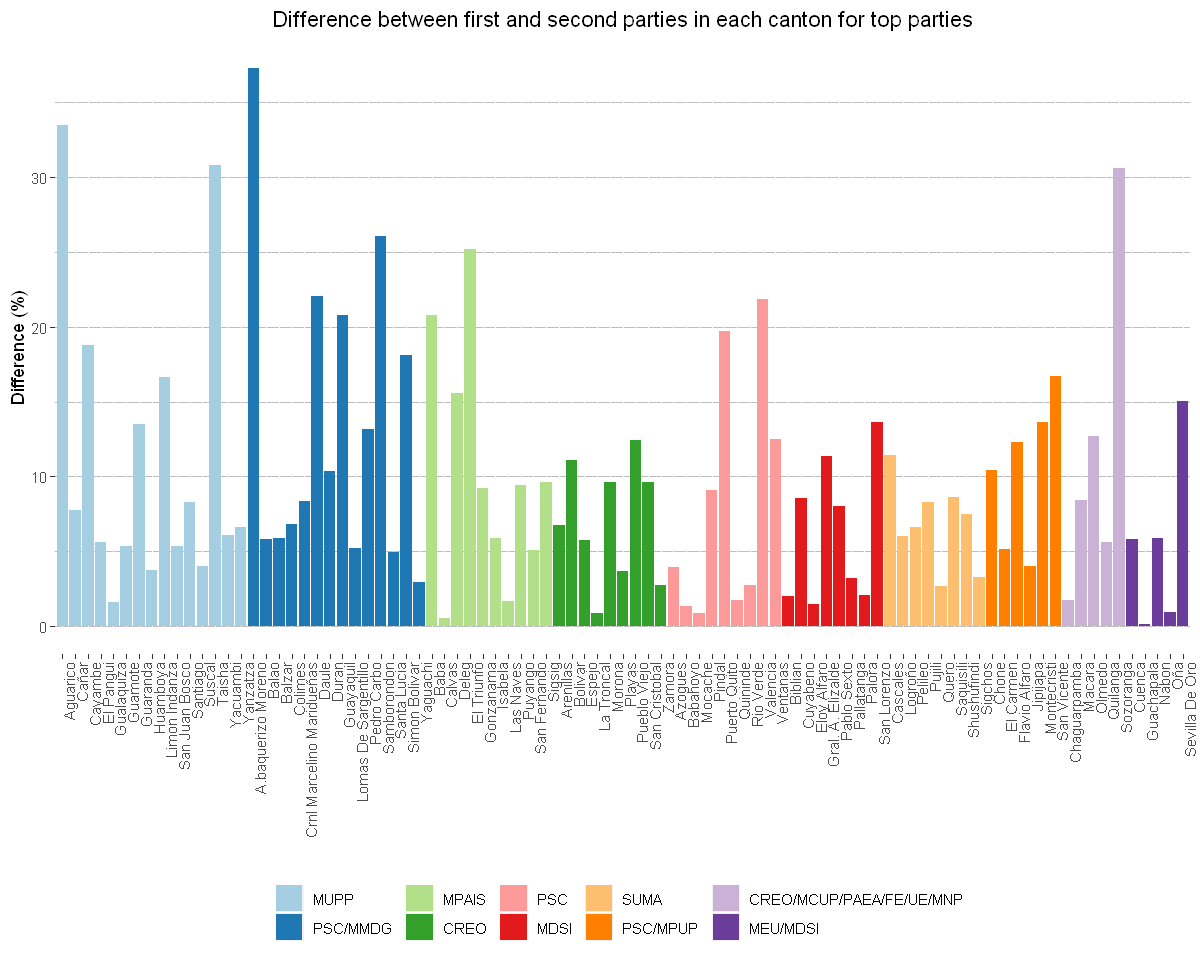

In [14]:
# getting difference between first and second parties when top parties won
fsp_results <- resultados_alc %>%
  select(-PROVINCIA_CODIGO, -PROVINCIA_NOMBRE) %>%
  group_by(CANTON_CODIGO) %>% 
  mutate(total = sum(VOTOS),
         perc = (VOTOS/total)*100) %>%
  arrange(CANTON_CODIGO, desc(VOTOS)) %>%
  mutate(order = row_number()) %>%
  filter(order <= 2) %>%
  mutate(dif_seg = perc - lead(perc),
         CANTON_NOMBRE = as.character(CANTON_NOMBRE)) %>% #CANTON_NOMBRE - name of city council
  filter(!is.na(dif_seg)) %>%
  left_join(partidos_alc %>% select(-OP_NOMBRE, -CANDIDATO_ESTADO), by = "CANDIDATO_CODIGO") %>%
  right_join(top_parties %>% ungroup() %>% mutate(party_n = row_number()), by = "OP_SIGLAS") %>%
  select(-order, -perc, -VOTOS, -total, -CANDIDATO_CODIGO) %>%
  arrange(desc(n), desc(dif_seg))

options(repr.plot.width=10, repr.plot.height=8)
fsp_plot <- ggplot(fsp_results, aes(reorder(CANTON_NOMBRE, party_n), dif_seg)) +
  geom_bar(aes(fill = reorder(OP_SIGLAS, party_n)), stat = "identity") +
  scale_fill_brewer(palette = 'Paired') +
  guides(fill = guide_legend(reverse = FALSE)) +
  ggtitle('Difference between first and second parties in each canton for top parties') +
  xlab('') +
  ylab('Difference (%)') +
  theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1),
        plot.title = element_text(hjust = 0.5),
        panel.background = element_rect(fill = 'white'),
        panel.grid.major.y = element_line(size = 0.05, linetype = 'solid', color='gray'),
        panel.grid.minor.y = element_line(size = 0.05, linetype = 'solid', color='gray'),
        legend.position = 'bottom',
        legend.title = element_blank())
fsp_plot

From the 89 victories from the top parties, ten had a difference over 20% of the votes with the second party. These cases would suggest a wide support from the electorate. However, by looking at individual cases, it is possible to identify how party performance is related to the number of candidates running for mayor at each city council.

In [19]:
# Canton: A. Baquerizo Moreno
ABM <- arrange(resultados_alc[which(resultados_alc$CANTON_NOMBRE=='A.baquerizo Moreno'),], desc(VOTOS)) %>%
  select(-PROVINCIA_CODIGO, -PROVINCIA_NOMBRE, -CANTON_CODIGO)
ABM
round((max(ABM$VOTOS)/sum(ABM$VOTOS))*100,3)

# Canton: Daule
DAU <- arrange(resultados_alc[which(resultados_alc$CANTON_NOMBRE=='Daule'),], desc(VOTOS)) %>%
  select(-PROVINCIA_CODIGO, -PROVINCIA_NOMBRE, -CANTON_CODIGO)
DAU
round((max(DAU$VOTOS)/sum(DAU$VOTOS))*100,3)

# Canton: Duran
DUR <- arrange(resultados_alc[which(resultados_alc$CANTON_NOMBRE=='Duran'),], desc(VOTOS)) %>%
  select(-PROVINCIA_CODIGO, -PROVINCIA_NOMBRE, -CANTON_CODIGO)
DUR
round((max(DUR$VOTOS)/sum(DUR$VOTOS))*100,3)

CANTON_NOMBRE,CANDIDATO_CODIGO,VOTOS
A.baquerizo Moreno,3576,7793
A.baquerizo Moreno,6576,1981
A.baquerizo Moreno,30928,1937
A.baquerizo Moreno,34716,1492
A.baquerizo Moreno,22648,1157
A.baquerizo Moreno,9839,522
A.baquerizo Moreno,21276,418
A.baquerizo Moreno,9487,184
A.baquerizo Moreno,29092,103


[1] 49.997

CANTON_NOMBRE,CANDIDATO_CODIGO,VOTOS
Daule,1162,28472
Daule,21019,10686
Daule,32938,7253
Daule,12817,6000
Daule,17590,4881
Daule,20742,4847
Daule,6387,3880
Daule,34926,3105
Daule,7717,2447
Daule,24656,2337


[1] 35.291

CANTON_NOMBRE,CANDIDATO_CODIGO,VOTOS
Duran,3455,47621
Duran,9466,33230
Duran,4423,30987
Duran,16883,7264
Duran,11645,4931
Duran,20092,2511
Duran,32630,2142
Duran,20490,1762
Duran,21873,1513
Duran,35634,1264


[1] 34.297

In the first case, the party that won in A. Baquerizo Moreno got 49.99% of the votes. Eight other parties were participating in this mayor race. However, in Daule, the winning party got 35.29% of the vote in an election with 18 candidates. Another canton, Duran, had 21 candidates, where the winner got little more than a third of the total votes (34,29%).

These few examples point to the existence of fragmentation in the political system. Moreover, the widespread use of alliances has not diminished the appearance of wide range of political organizations. In this case, the main issue with fragmentation has to do with the legitimacy of the party in power. Being elected with less than half of support in a scenario with more than ten political parties could potentially constrained the party performance once in power.

### Future Work

This is small exploratory analysis that could serve as a basis for further research. In this sense, it would be interesting to explore difference at geographical level to check if party fragmentation is concentrated over certain regions. The analysis only took into account the number of victories, but it would also be interesting to determine performance based on the number of votes, since this would also control for population size. The dataset has the number of votes as well. Finally, it would be possible to establish the likelihood of victory of each party, based on its participation in certain locations and measuring its performance compared to other parties.